In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.linear_model import ElasticNet

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
file_path="D:/BE-project/datasets/GDSC_DATASET.csv"

In [11]:
df=pd.read_csv(file_path)

In [12]:
df.head()

,COSMIC_ID,0,0.1,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [13]:
print(df.columns)

Index(['COSMIC_ID', '0', '0.1', 'DRUG_ID', 'DRUG_NAME', 'LN_IC50', 'AUC',
       'Z_SCORE', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2',
       'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   0                                        242035 non-null  object 
 2   0.1                                      240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [15]:
df.describe()

,COSMIC_ID,DRUG_ID,LN_IC50,AUC,Z_SCORE
count,2.420350e+05,242035.000000,242035.000000,242035.000000,242035.000000
mean,9.921071e+05,1594.044886,2.817111,0.882593,0.000006
std,2.209814e+05,398.739728,2.762191,0.146998,0.999390
min,6.836670e+05,1003.000000,-8.747724,0.006282,-8.254501
25%,9.068050e+05,1149.000000,1.508054,0.849452,-0.656842
50%,9.097200e+05,1631.000000,3.236744,0.944197,0.010585
75%,1.240144e+06,1912.000000,4.700111,0.974934,0.656036
max,1.789883e+06,2499.000000,13.820189,0.998904,7.978776


# Select Relevant feactures


In [16]:
feature_columns=["Gene Expression","CNA"]

In [17]:
target_column="LN_IC50"

In [18]:
#drop rows with missing values in target or feature columns
df=df.dropna(subset=[target_column]+feature_columns)

In [19]:
df.head()

,COSMIC_ID,0,0.1,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


# Split the Data into Feactures(x) and Target(y)


In [20]:

x=df[feature_columns]
y=df[target_column]

In [21]:
x

,Gene Expression,CNA
0,Y,Y
1,Y,Y
2,Y,Y
3,Y,Y
4,Y,Y
...,...,...
242029,Y,Y
242030,Y,Y
242031,Y,Y
242032,Y,Y


In [22]:
y

0         -1.463887
1         -3.360586
2         -5.044940
3         -3.741991
4         -5.142961
            ...    
242029     9.316959
242030    10.127082
242031     8.576377
242032    10.519636
242033    10.694579
Name: LN_IC50, Length: 232669, dtype: float64

# normalize the Data

In [23]:
df.dtypes

COSMIC_ID                                    int64
0                                           object
0.1                                         object
DRUG_ID                                      int64
DRUG_NAME                                   object
LN_IC50                                    float64
AUC                                        float64
Z_SCORE                                    float64
GDSC Tissue descriptor 1                    object
GDSC Tissue descriptor 2                    object
Cancer Type (matching TCGA label)           object
Microsatellite instability Status (MSI)     object
Screen Medium                               object
Growth Properties                           object
CNA                                         object
Gene Expression                             object
Methylation                                 object
TARGET                                      object
TARGET_PATHWAY                              object
dtype: object

In [26]:
df.loc[:, 'Gene Expression'] = df['Gene Expression'].map({'Y': 1, 'N': 0})

In [27]:
df.loc[:, 'CNA'] = df['CNA'].map({'Y': 1, 'N': 0})

In [30]:
df.head()

,COSMIC_ID,0,0.1,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,1,1,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,1,1,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,1,1,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,1,1,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,1,1,Y,TOP1,DNA replication


In [31]:
x=df[feature_columns]
y=df[target_column]

In [32]:
scaler=StandardScaler()

In [33]:
x_scaled=scaler.fit_transform(x)

In [36]:
print(x_scaled)

[[0.14488977 0.06629134]
 [0.14488977 0.06629134]
 [0.14488977 0.06629134]
 ...
 [0.14488977 0.06629134]
 [0.14488977 0.06629134]
 [0.14488977 0.06629134]]


# Split the Data into Training and Testing Sets

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [38]:
x_train.shape

(186135, 2)

In [40]:
x_test.shape

(46534, 2)

In [41]:
y_train.shape

(186135,)

In [42]:
y_test.shape

(46534,)

# Train the ElasticNet Model

In [43]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)

In [44]:
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

# Make Predictions

In [45]:
y_pred=elastic_net.predict(x_test)

In [47]:
print(y_pred[:5])

[2.80362497 2.80362497 2.80362497 2.80362497 2.80362497]


# Evaluate the Model

In [49]:
r2=r2_score(y_test,y_pred)

In [50]:
mse=mean_squared_error(y_test,y_pred)

In [54]:
print("R2 score:")
print(r2)

R2 score:
2.6566812261652473e-05


In [56]:
print("Mean Squared Error:")
print(mse)

Mean Squared Error:
7.657217928748374


#  Visualize the Results

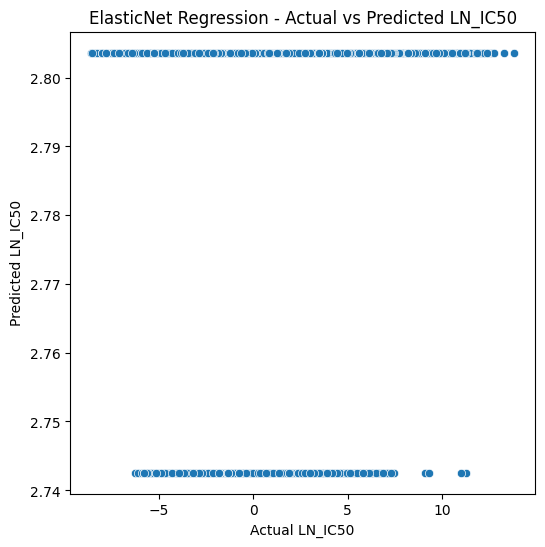

In [62]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual LN_IC50")
plt.ylabel("Predicted LN_IC50")
plt.title("ElasticNet Regression - Actual vs Predicted LN_IC50")
plt.show()